### Duda 1.-¿Como combinamos gráficas?
Para combinar distintos tipos de gráficos en una misma gráfica retomaremos nuestro dataframe de consumo de agua.

La forma más sencilla de añadir dos tipos de gráficos en la misma gráfica es duplicar la instrucción:

**nombredeldataframe.plot(kind='tipo de gráfica1', atributos puedes incluir un marcador y color distinto)**

**nombredeldataframe.plot(kind='segundo tipo de gráfica', atributos puedes incluir un marcador y color distinto)**

In [16]:
#Recuerda importar todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pylab, mlab, pyplot

In [17]:
aguacp = pd.read_csv("basecompletaconpob.csv", encoding="UTF-8")
aguacp 

,alcaldia,Pob2019_H,Pob2019_M,Pob_Tot2019,CTDomestico,CTNODomestico,CTMixto,consumo_total,CTpPobtot,Categoriaconsumo
0,ALVARO OBREGON,360335,395285,755620,2848471.520,762543.210,486470.55,4.097485e+06,5.422680,BAJO
1,AZCAPOTZALCO,192944,216916,409860,4343306.130,610362.310,854549.49,5.808218e+06,14.171224,ALTO
2,BENITO JUAREZ,198095,232259,430354,7935253.841,1614444.471,1036532.35,1.058623e+07,24.598891,MUY ALTO
3,COYOACAN,293039,330644,623683,2459695.160,586953.650,325060.72,3.371709e+06,5.406127,BAJO
4,CUAJIMALPA,95608,103772,199380,629755.090,143581.710,123931.95,8.972687e+05,4.500294,BAJO
5,CUAUHTEMOC,259989,287714,547703,8744129.539,2844224.430,2081876.31,1.367023e+07,24.959203,MUY ALTO
6,GUSTAVO A. MADERO,567165,613564,1180729,5878477.350,803802.500,1398647.18,8.080927e+06,6.844015,MEDIO
7,IZTACALCO,186979,207469,394448,3958748.050,650252.270,657270.53,5.266271e+06,13.350989,ALTO
8,IZTAPALAPA,885252,938216,1823468,2946168.720,461752.130,672698.58,4.080620e+06,2.237834,MUY BAJO
9,MAGDALENA CONTRERAS,117979,127396,245375,413205.220,87372.540,60795.85,5.613737e+05,2.287819,MUY BAJO


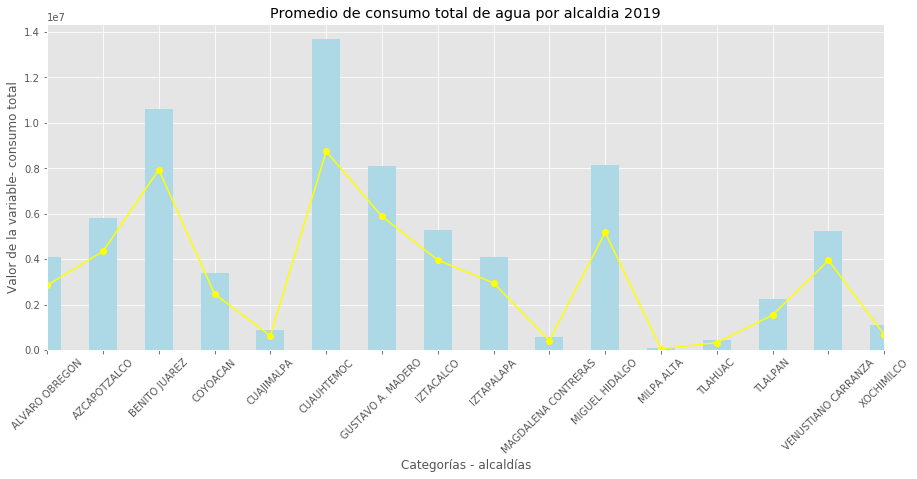

In [5]:
#Ejemplo
#
plt.style.use('ggplot') #estilo de la gráfica
datos = aguacp.groupby(["alcaldia"]).consumo_total.mean() #datos a utilizar
datos2 = aguacp.groupby(["alcaldia"]).CTDomestico.mean() 
ax = datos.plot(kind='bar',figsize=(15, 6),color = 'lightblue') #gráfica 1
datos2.plot(kind='line',figsize=(15, 6),color = 'yellow', marker="o") #gráfica 2 aquí colocamos marcadores en forma de diamante
plt.xticks(rotation=45) #rotación de las etiquetas del eje x
plt.title("Promedio de consumo total de agua por alcaldia 2019") #Título del Gráfico
plt.ylabel("Valor de la variable- consumo total") #Título eje Y
plt.xlabel("Categorías - alcaldías") #Título eje X
#
plt.show()

### Duda 2.-¿Como colocamos las etiquetas de cada observación en la gráfica?
Para ilustrar este procedimiento utilizaremos la gráfica anterior. 
En matplotlib se utiliza la instrucción **annotate** para realizar anotaciones en las gráficas incluyendo la etiqueta de los datos que se muestran en el gráfico.

* En la documentación de matplotlib hay otros ejemplos de anotaciones: flechas, burbujas, etc
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html

* De forma general, para cada anotación se requieren las coordenadas x,y en las que se va a desplegar la información.
* Dado que las gráficas que utilizamos se muestran en un plano x,y ,annotate "lee" el eje de las y como la altura a la que se mostrará cada etiqueta.
* Para obtener todas las coordenadas se requiere un loop que se construye de la siguiente forma:

  1) guardamos la gráfica en el objeto ax,  **ej: ax = datos.plot(kind ='bar',figsize=(15, 6),color = 'lightblue')**
  
  2) Iniciamos el loop,   **ej for p in ax.patches:**
  
  3) Indicamos que para cada elemento se genere una anotación  **ej   ax.annotate; que muestre el string de la altura            (str(p.get_height()), en la posición(X,Y) y un par de milimetros extra (p.get_x() * 1.005, p.get_height() * 1.005),        puedes añadir un color, tamaño,etc --color = 'blue')**
          
          
* Veamos el ejemplo

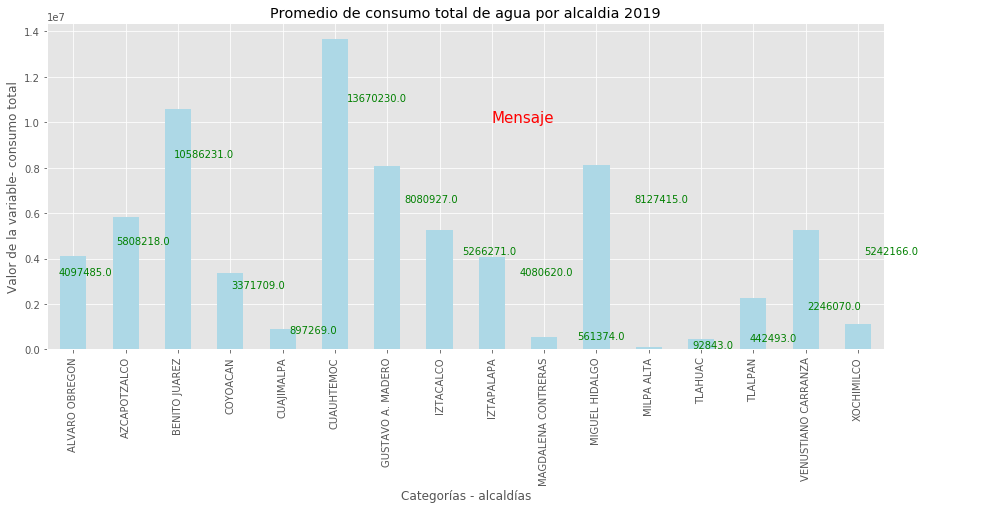

In [15]:
plt.style.use('ggplot')
#
datos = aguacp.groupby(["alcaldia"]).consumo_total.mean().round()
ax = datos.plot(kind='bar',figsize=(15, 6),color = 'lightblue')
# LOOP:
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.1, p.get_height() * 0.8), color = 'green')
#
plt.xticks(rotation=90)
#
ax.annotate("Mensaje", (8, 10000000), color = 'red', fontsize = 15)
plt.title("Promedio de consumo total de agua por alcaldia 2019")
plt.ylabel("Valor de la variable- consumo total")
plt.xlabel("Categorías - alcaldías")
plt.show()

### Duda 3.-¿Cómo colocamos un segundo eje?
* Para colocar un segundo eje (otra forma de graficar una segunda serie de datos), recurriremos a la instrucción **ax.twinx()**
* 1) añadimos una nueva serie de datos, en este caso los datos de población por alcaldía
    **datos2=aguacp.groupby(["alcaldia"]).Pob_Tot2019.mean().round()**
* 2) Iniciamos un segundo eje X que comparte los valores del primer eje x
     **ax2 = ax.twinx()**
     Podemos personalizar la etiqueta de los datos de los valores Y que acompañaran a los valores "gemelos" de X, en este        caso los datos de población.**ax2.set_ylabel("Pob_Tot2019", color=color)**
* 3) Finalmente utilizamos la instrucción **.plot** para graficar la segunda serie de datos **ax2.plot(datos2, color=color)**

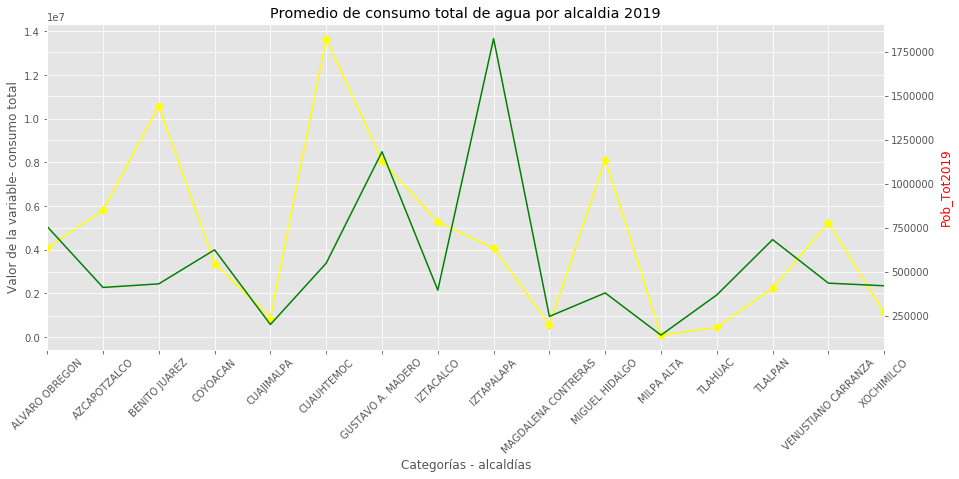

In [18]:
plt.style.use('ggplot')
#
datos = aguacp.groupby(["alcaldia"]).consumo_total.mean().round()
datos2 = aguacp.groupby(["alcaldia"]).Pob_Tot2019.mean().round()
#
ax = datos.plot(kind='line',figsize=(15, 6), color = 'yellow', marker="D")
plt.xticks(rotation=45)
plt.title("Promedio de consumo total de agua por alcaldia 2019")
plt.ylabel("Valor de la variable- consumo total")
plt.xlabel("Categorías - alcaldías")
#
ax2 = ax.twinx()  # iniciamos un segundo eje X que comparte los valores del primer eje x
color = 'red'
ax2.set_ylabel("Pob_Tot2019", color = color)  
ax2.plot(datos2, color = 'green')
#
plt.show()